<img src="UFC.png" 
        alt="UFC Logo" 
        width="800" 
        height="600" 
        style="display: block; margin: 0 auto" />

by **Dayyan Fundi and Gavela Maculuve**

Dataset: <a href="https://www.kaggle.com/datasets/neelagiriaditya/ufc-datasets-1994-2025/data">UFC DATASETS [1994-2025]</a> 

UFC DATASETS [1994-2025] is a collection of all UFC fights from March 11, 1994, to July 12, 2025. We chose this because of our appreciation and love for the art of fighting. 

UFC DATASETS has four CSV files, namely:
- event_details
- fight_details
- fighter_details
- and UFC
  
They contain a lot of information, ranging from:
- Fighter Attributes (height, reach, stance, etc)
- Winning Methods (KO, submission, decision, etc)
- Division and Weight Classes
- Strike success, takedowns, control time, etc.

#### Our Goal: Predict whether the <span style="color:red;">Red</span>  or <span style="color:blue;">Blue</span>  corner fighter will win based on the fight details, fighter attributes, and fighter career stats.

# Some Key Terms

#### Fighter Attributes 
* `stance` → Stance (e.g., Orthodox, Southpaw)
* `dob` → Date of Birth
---
#### Striking
* `splm` → Significant Strikes Landed per Minute (SLpM)
* `str_acc` → Significant Strike Accuracy (%)
* `sapm` → Significant Strikes Absorbed per Minute (SApM)
* `str_def` → Strike Defense (%)
---
#### Grappling
* `td_avg` → Average Takedowns Landed
* `td_avg_acc` → Takedown Accuracy (%)
* `td_def` → Takedown Defense
* `sub_avg` → Average Submission Landed
---

* `division` → Weight Division (such as Flyweight, Bantamweight, Strawweight, Light Heavyweight)
* `title_fight` → Title Fight (Yes/No)
* `method` → Method of Victory (such as knockout, submission, decision, and disqualification)

---
### Fighter (red and blue)

**Prefixes `r_` is for red fighter, and `b_` is for blue fighter**

* `_kd` → Red Fighter Knockdowns
* `_sig_str_landed` → Fighter Significant Strikes Landed
* `_sig_str_atmpted` → Fighter Significant Strikes Attempted
* `_sig_str_acc` → Fighter Significant Strike Accuracy (%)
* `_total_str_landed` → Fighter Total Strikes Landed
* `_total_str_atmpted` → Fighter Total Strikes Attempted
* `_total_str_acc` → Fighter Total Strike Accuracy (%)
* `_td_landed` → Fighter Takedowns Landed
* `_td_atmpted` → Fighter Takedowns Attempted
* `_td_acc` → Fighter Takedown Accuracy (%)
* `_sub_att` → Fighter Submission Attempts
* `_ctrl` → Fighter Control Time
* `_head_landed` → Fighter Head Strikes Landed
* `_head_atmpted` → Fighter Head Strikes Attempted
* `_head_acc` → Fighter Head Strike Accuracy (%)
* `_body_landed` → Fighter Body Strikes Landed
* `_body_atmpted` → Fighter Body Strikes Attempted
* `_body_acc` → Fighter Body Strike Accuracy (%)
* `_leg_landed` → Fighter Leg Strikes Landed
* `_leg_atmpted` → Fighter Leg Strikes Attempted
* `_leg_acc` → Fighter Leg Strike Accuracy (%)
* `_dist_landed` → Fighter Distance Strikes Landed
* `_dist_atmpted` → Fighter Distance Strikes Attempted
* `_dist_acc` → Fighter Distance Strike Accuracy (%)
* `_clinch_landed` → Fighter Clinch Strikes Landed
* `_clinch_atmpted` → Fighter Clinch Strikes Attempted
* `_clinch_acc` → Fighter Clinch Strike Accuracy (%)
* `_ground_landed` → Fighter Ground Strikes Landed
* `_ground_atmpted` → Fighter Ground Strikes Attempted
* `_ground_acc` → Fighter Ground Strike Accuracy (%)
* `_landed_head_per` → Fighter % of Strikes to Head
* `_landed_body_per` → Fighter % of Strikes to Body
* `_landed_leg_per` → Fighter % of Strikes to Legs
* `_landed_dist_per` → Fighter % of Strikes at Distance
* `_landed_clinch_per` → Fighter % of Strikes in Clinch
* `_landed_ground_per` → Fighter % of Strikes on Ground
---

# Importing

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

### Importing the Dataset

In [2]:
ufc = pd.read_csv('/Users/Gavela Maculuve/PycharmProjects/CSCI 250/data/UFC DATASETS/ufc.csv')
print(f"Our dataset has {ufc.shape[0]} rows and {ufc.shape[1]} columns.\n")
ufc.head()

Our dataset has 8312 rows and 124 columns.



,event_id,event_name,date,location,fight_id,division,title_fight,method,finish_round,match_time_sec,...,b_splm,b_str_acc,b_sapm,b_str_def,b_td_avg,b_td_avg_acc,b_td_def,b_sub_avg,winner,winner_id
0,421ccfc6ddb17958,UFC 319: Du Plessis vs. Chimaev,2025/08/16,"Chicago, Illinois, USA",82338ba457fbe87f,flyweight,0,Submission,2,279,...,2.40,58,4.52,38,0.00,0,57,0.0,Tim Elliott,c96d9178c9ed9e62
1,421ccfc6ddb17958,UFC 319: Du Plessis vs. Chimaev,2025/08/16,"Chicago, Illinois, USA",1d8dc0fb5d47357f,lightweight,0,KO/TKO,1,298,...,4.38,40,4.62,57,1.24,36,71,0.1,Alexander Hernandez,262a7d06203657e6
2,421ccfc6ddb17958,UFC 319: Du Plessis vs. Chimaev,2025/08/16,"Chicago, Illinois, USA",5b880d10b0ed7acc,middleweight,0,KO/TKO,1,183,...,5.27,51,4.51,59,1.05,43,48,0.0,Michal Oleksiejczuk,0d65c432720accb9
3,421ccfc6ddb17958,UFC 319: Du Plessis vs. Chimaev,2025/08/16,"Chicago, Illinois, USA",42585ce706c086de,welterweight,0,KO/TKO,1,299,...,3.60,54,4.79,48,0.25,100,83,0.0,Carlos Prates,7ee0fd831c0fe7c3
4,421ccfc6ddb17958,UFC 319: Du Plessis vs. Chimaev,2025/08/16,"Chicago, Illinois, USA",12cedec11b37ddc0,middleweight,1,Decision - Unanimous,5,300,...,5.36,58,3.25,41,4.31,46,100,2.8,Khamzat Chimaev,767755fd74662dbf


In [3]:
# Display general descriptive statistics for all columns
summary = ufc.describe(include='all')

# Extract only the relevant columns and stats
selected_summary = pd.DataFrame({
    'division_unique': summary.loc['unique', 'division'] if 'division' in summary.columns else None,
    'division_top': summary.loc['top', 'division'] if 'division' in summary.columns else None,
    'method_top': summary.loc['top', 'method'] if 'method' in summary.columns else None,
    'finish_round_mean': summary.loc['mean', 'finish_round'] if 'finish_round' in summary.columns else None,
    'finish_round_std': summary.loc['std', 'finish_round'] if 'finish_round' in summary.columns else None,
    'total_round_mean': summary.loc['mean', 'total_rounds'] if 'total_rounds' in summary.columns else None,
    'total_round_std': summary.loc['std', 'total_rounds'] if 'total_rounds' in summary.columns else None
}, index=['value']).T

display(selected_summary)

,value
division_unique,103
division_top,lightweight
method_top,Decision - Unanimous
finish_round_mean,2.354187
finish_round_std,1.017313
total_round_mean,3.135491
total_round_std,0.649598


C:\Users\Gavela Maculuve\AppData\Local\Temp\ipykernel_15344\2626421112.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(
C:\Users\Gavela Maculuve\AppData\Local\Temp\ipykernel_15344\2626421112.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(


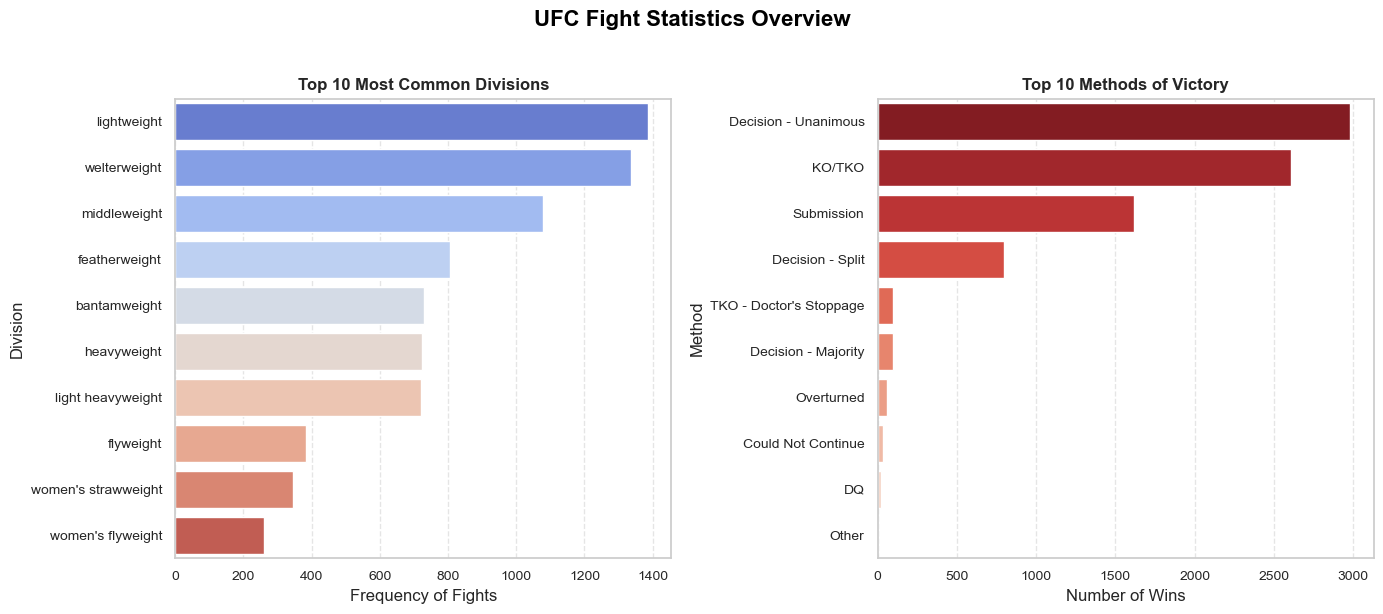

In [4]:
plt.figure(figsize=(14,6))
sb.set_theme(style="whitegrid")

# Top 10 Divisions
plt.subplot(1,2,1)
sb.barplot(
    x=ufc['division'].value_counts().head(10).values,
    y=ufc['division'].value_counts().head(10).index,
    #hue=ufc['division'].index, # to take out the warning message
    palette='coolwarm'
)

plt.title('Top 10 Most Common Divisions', fontweight='bold')
plt.xlabel('Frequency of Fights')
plt.ylabel('Division')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Methods of Victory
plt.subplot(1,2,2)
sb.barplot(
    x=ufc['method'].value_counts().head(10).values,
    y=ufc['method'].value_counts().head(10).index,
    #hue=ufc['method'].index, # to take out the warning message
    palette='Reds_r'
)
plt.title('Top 10 Methods of Victory', fontweight='bold')
plt.xlabel('Number of Wins')
plt.ylabel('Method')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.suptitle('UFC Fight Statistics Overview', fontsize=16, fontweight='bold', color='black', y=1.02)
plt.tight_layout()
plt.show()

# Data Cleaning

In [5]:
# Ensure pandas shows everything
pd.set_option('display.max_columns', None)   # Show all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)         # Prevent line wrapping

### Checking for NaNs

In [6]:
ufc.isna().sum()

event_id                  0
event_name                0
date                      0
location                  0
fight_id                  0
division                  0
title_fight               0
method                    0
finish_round              0
match_time_sec            0
total_rounds             31
referee                  26
r_name                    0
r_id                      0
r_kd                     21
r_sig_str_landed         21
r_sig_str_atmpted        21
r_sig_str_acc            59
r_total_str_landed       21
r_total_str_atmpted      21
r_total_str_acc          48
r_td_landed              21
r_td_atmpted             21
r_td_acc               2675
r_sub_att                21
r_ctrl                  202
r_head_landed            21
r_head_atmpted           21
r_head_acc               99
r_body_landed            21
r_body_atmpted           21
r_body_acc              856
r_leg_landed             21
r_leg_atmpted            21
r_leg_acc              1578
r_dist_landed       

**We decided to completetly discard the columns if its data contains 50 or more % of NaNs values**

In [7]:
# Computing the percentage of NaNs in each column
missing_percent = (ufc.isna().sum() / len(ufc)) * 100
missing = missing_percent[missing_percent >0].sort_values(ascending=False)
print(missing)

b_ground_acc           45.741097
b_td_acc               37.475938
r_ground_acc           35.406641
r_td_acc               32.182387
b_nick_name            28.645332
r_nick_name            27.887392
b_clinch_acc           24.458614
r_clinch_acc           23.989413
r_leg_acc              18.984601
b_leg_acc              18.804139
b_body_acc             11.958614
b_reach                10.839750
r_body_acc             10.298364
r_reach                 5.052936
b_ctrl                  2.430221
r_ctrl                  2.430221
b_dob                   2.189605
b_head_acc              1.888835
winner_id               1.768527
winner                  1.768527
r_dist_acc              1.672281
b_dist_acc              1.551973
r_head_acc              1.191049
b_sig_str_acc           0.950433
b_stance                0.842156
r_dob                   0.830125
r_sig_str_acc           0.709817
b_total_str_acc         0.685756
r_total_str_acc         0.577478
total_rounds            0.372955
r_stance  

**One of our first problems was that important feautures  use had a high percentage of NaN values. So, we decided to dig deeper to understand the root of this problem. We found out that the NaN values represented an empty cell, because the fighter would not have attempted these attacks. We no attempts, there won't be any successful landing, so that is why we have  a lot of NaNs**

<img src="NaN_Problems.png" 
        alt="UFC Logo" 
        width="500" 
        height="600" 
        style="display: block; margin: 0 auto" />

Now that we know the root of the problem we divised a solution to tackle it:

1) For the numerical data, we will fill the empty cells with 0. This is because we beleive it is reasonable to think that when a fighter attempeted zero strikes, takedowns, or clinches, their accuracy in the category is effectively 0% since the didn't land anything.
   
2) For the categorical data, such as the winner column, we decide to erase all the NaNs, as we are assuming that those empty cells signified a draw. Additionaly, our aim is to predict wins, so it is not really relevant to maintain such values.

We also decided to keep:
- Performace Metrics (Strikes, control, ...): as they show what happened in the fight
- Fighter Atrributtes (Height, weight, reach, ...): as they describe the fighters themselves.
- Carrer Stats (wins, losses, strike accuracy, ...): as they measure the fighter quality going into the fight.

In [8]:
fight_stats = [col for col in ufc.columns if any(
    i in col for i in ['sig_str', 'total_str', 'td', 'ctrl', 'head', 'body', 'leg', 'dist','clinch', 'ground', 'sub_att', 'kd', 'acc'])]

for col in fight_stats:
    if col in ufc.columns:
        ufc[col] = ufc[col].fillna(0)

In [9]:
# Compute numeric columns with their mean
fighter_attrs = [
    'r_height', 'r_weight', 'r_reach',
    'b_height', 'b_weight', 'b_reach']

for col in fighter_attrs:
    if col in ufc.columns:
        ufc.loc[:, col] = ufc.groupby('division')[col].transform(lambda x: x.fillna(x.mean()))

In [10]:
# Filling categorical columns with their mode
for col in ['r_stance', 'b_stance', 'total_rounds']:
    if col in ufc.columns:
        mode_value = ufc[col].fillna(ufc[col].mode()[0])
        ufc.loc[:, col] = ufc[col].fillna(mode_value)

`And discarded everything else that we felt like it didn't add value to our investigation.`

In [11]:
cols_to_drop = [
    'event_id', 'event_name','fight_id', 'r_id', 'b_id',
    'r_nick_name', 'b_nick_name', 'referee', 'location', 'winner_id', 'r_dob', 'b_dob']
ufc.drop(columns=[col for col in cols_to_drop if col in ufc.columns], inplace=True)

percentage_cols = [col for col in ufc.columns if '_per' in col]
ufc.drop(columns=percentage_cols, inplace=True)

In [12]:
# Again, we are dropping the NaNs in column 'winner', as we assume these NaNs are draws, and we only want wins.
ufc= ufc.dropna(subset=['winner'])

In [13]:
print(f"Our dataset has {ufc.shape[0]} rows and {ufc.shape[1]} columns.\n")

Our dataset has 8165 rows and 100 columns.



In [14]:
# Checking if we missed any NaNs
missing_percent = (ufc.isna().sum() / len(ufc)) * 100
missing = missing_percent[missing_percent >0].sort_values(ascending=False)
print(missing)

b_reach    1.579914
r_reach    0.244948
dtype: float64


We believe that the reach NaNs were not filled due to the way we grouped the fighter attributes by their division.
```python
ufc.groupby('division')[col].transform(lambda x: x.fillna(x.mean()))

This approach worked for most attributes but failed for a few rows in the 'reach' columns. We believe this happened because some divisions in the dataset have no reach data (e.g., a "Catch Weight" fight might be the only entry for that category), making it impossible to calculate a divisional mean.

#### Before Dropping NANs in Reach

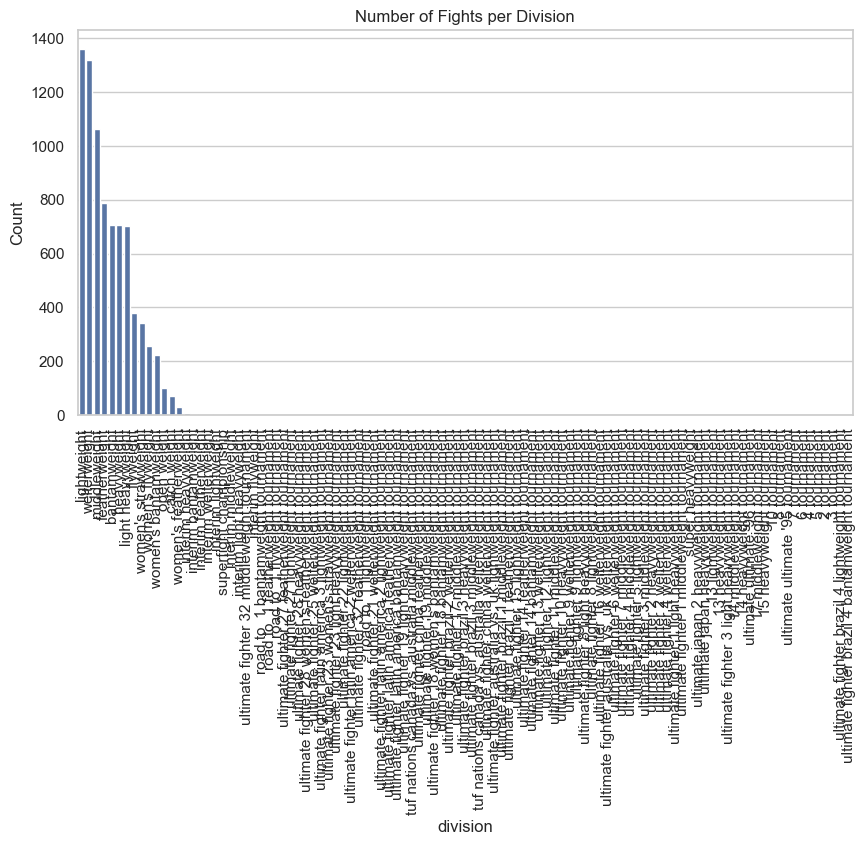

In [15]:
division_counts = ufc['division'].value_counts()

plt.figure(figsize=(10,5))
sb.barplot(x=division_counts.index, y=division_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Fights per Division')
plt.ylabel('Count')
plt.show()

In [16]:
ufc = ufc.dropna(subset=['b_reach', 'r_reach'])

In [17]:
missing_percent = (ufc.isna().sum() / len(ufc)) * 100
missing = missing_percent[missing_percent >0].sort_values(ascending=False)
print(missing)

Series([], dtype: float64)


In [18]:
print(f"Our dataset has {ufc.shape[0]} rows and {ufc.shape[1]} columns.\n")

Our dataset has 8030 rows and 100 columns.



#### After Dropping NANs in Reach

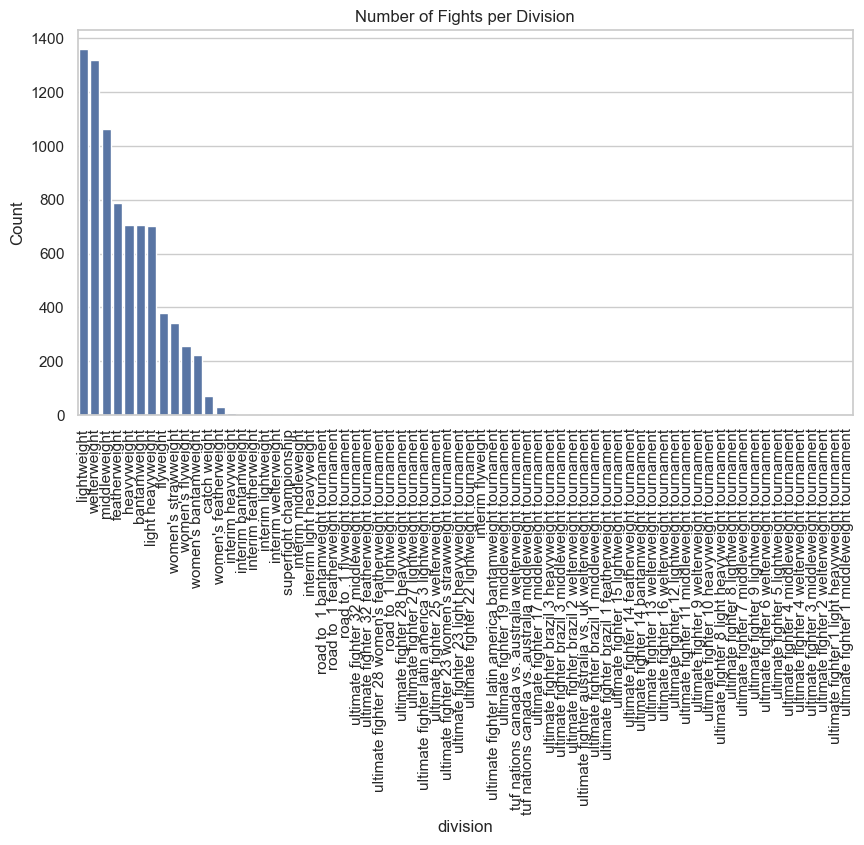

In [19]:
division_counts = ufc['division'].value_counts()

plt.figure(figsize=(10,5))
sb.barplot(x=division_counts.index, y=division_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Fights per Division')
plt.ylabel('Count')
plt.show()

# Prediction

### Dependent Variable

In [20]:
ufc['winner'].unique()

array(['Tim Elliott', 'Alexander Hernandez', 'Michal Oleksiejczuk', ...,
       'John Cholish', 'Jake Hecht', 'Alice Ardelean'], dtype=object)

In [21]:
ufc['winner_red_blue'] = np.where( ufc['winner'] == ufc['r_name'], 1, np.where(ufc['winner'] == ufc['b_name'], 0, np.nan))

In [22]:
ufc[['winner', 'winner_red_blue']].head(4)

,winner,winner_red_blue
0,Tim Elliott,1.0
1,Alexander Hernandez,0.0
2,Michal Oleksiejczuk,0.0
3,Carlos Prates,0.0


In [23]:
ufc['winner_red_blue'].value_counts(dropna=False)

winner_red_blue
1.0    5145
0.0    2885
Name: count, dtype: int64

### Independent Variable

In [24]:
features = [
    # striking
    "r_sig_str_acc", "b_sig_str_acc", "r_total_str_acc", "b_total_str_acc",
    "r_head_acc", "b_head_acc", "r_body_acc", "b_body_acc",
    "r_leg_acc", "b_leg_acc", "r_clinch_acc", "b_clinch_acc", "r_ground_acc", "b_ground_acc",

    # grappling
    "r_td_acc", "b_td_acc", "r_td_def", "b_td_def", "r_ctrl", "b_ctrl",
    "r_sub_att", "b_sub_att", "r_sub_avg", "b_sub_avg",

    # experience
    "r_wins", "r_losses", "r_draws", "b_wins", "b_losses", "b_draws",

    # physical
    "r_height", "b_height", "r_weight", "b_weight", "r_reach", "b_reach"
]

In [25]:
new_ufc = ufc[features + ['winner_red_blue']]
x = new_ufc.drop("winner_red_blue", axis = 1)
y = new_ufc["winner_red_blue"]

### Importing more libraries

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Splitting data into train and test sets

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state = 42)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(6022, 36) (2008, 36) (6022,) (2008,)


In [28]:
# Scale features
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.fit_transform(xtest)

**The Standard Scaler puts all variables in the same scale. This allows features to have an equal influence**

### Train logisitc regression

**We chose to use Logistic Regression, as our goal was to perfom a binary classification.**

In [29]:
model = LogisticRegression(random_state  = 0, solver= 'lbfgs', max_iter =2000)
model.fit(xtrain_scaled, ytrain)

LogisticRegression(max_iter=2000, random_state=0)

In [30]:
y_pred = model.predict(xtest_scaled)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [31]:
score =  model.score(xtest_scaled,ytest)
print("Accuracy: ", score)

Accuracy:  0.827191235059761


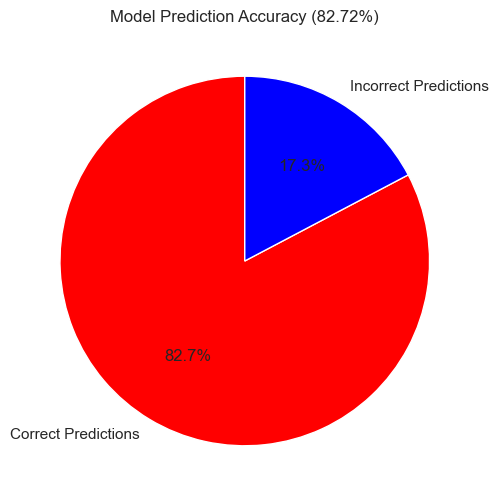

In [32]:
# Given
total = 2008
accuracy = score

# Calculate counts
correct = int(total * accuracy)
incorrect = total - correct

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    [correct, incorrect],
    labels=['Correct Predictions', 'Incorrect Predictions'],
    colors=['red', 'blue'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title(f"Model Prediction Accuracy ({accuracy*100:.2f}%)")
plt.show()


#### So out of all 2008 fights in test set, roughtly 1660 were predicted correctly.

### Confusion Matrix

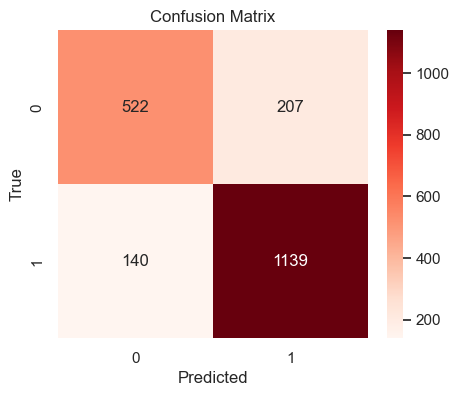

In [33]:
plt.figure(figsize=(5,4))
sb.heatmap(confusion_matrix(ytest, y_pred), annot=True, fmt = "d", cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

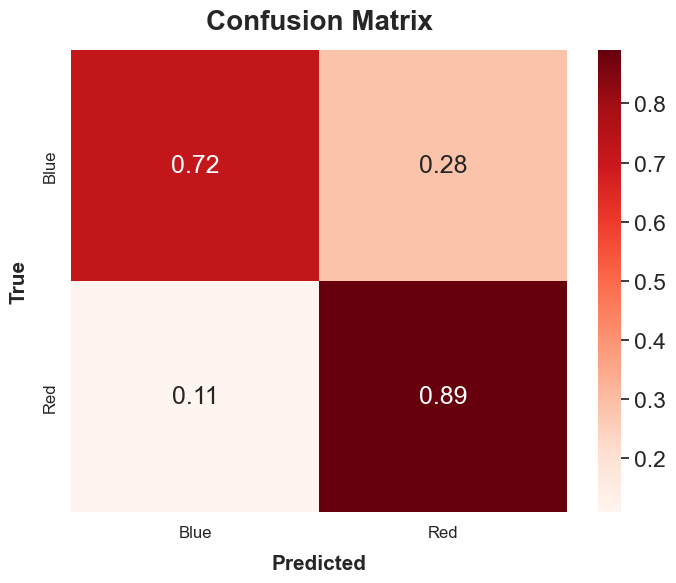

In [34]:
numClasses = 2
labels = ['Blue','Red']

conf = np.zeros([numClasses,numClasses])
guesses = model.predict(xtest_scaled)

for color in range(len(ytest)):
    real = int(ytest.iloc[color])
    guess = int(guesses[color])
    conf[real,guess] += 1

# Convert counts into %
rowsums = np.sum(conf,1, keepdims=True)
rowsums = np.reshape(rowsums,[numClasses,1])
rowsums = np.repeat(rowsums,numClasses, axis = 1)
conf = conf / rowsums

df_cm = pd.DataFrame(conf, index = [color for color in labels],
                  columns = [i for i in labels])

plt.figure(figsize = (8,6))
sb.set(font_scale=1.5)  # controls general font scale
sb.heatmap(df_cm, annot=True, cmap='Reds')

plt.title("Confusion Matrix", fontsize = 20, weight='bold', pad=15)
plt.xlabel("Predicted", fontsize = 15, weight='bold', labelpad=10)
plt.ylabel("True", fontsize = 15, weight='bold', labelpad=10)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

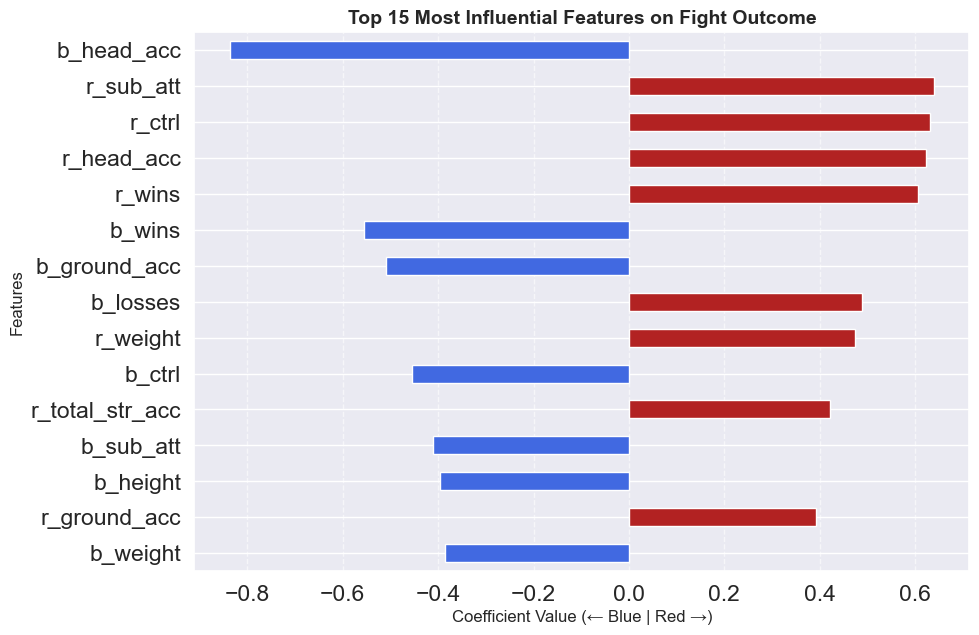

In [35]:
# Compute feature importances
importance = pd.Series(model.coef_[0], index=x.columns)
# Sort by absolute value (strongest predictors first)
importance = importance.reindex(importance.abs().sort_values(ascending=False).index)

plt.figure(figsize=(10,7))
colors = importance.apply(lambda x: 'firebrick' if x > 0 else 'royalblue') # positive: red (Red win), negative: blue (Blue win)

# Plot horizontal bar chart
importance.head(15).plot(kind='barh', color=colors.head(15))

plt.title("Top 15 Most Influential Features on Fight Outcome", fontsize=14, fontweight='bold')
plt.xlabel("Coefficient Value (← Blue | Red →)", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # most influential on top

plt.show()

# Reflection

## Things we could have done better

The model achieved moderate accuracy in predicting fight winners.

- Using relative strength instead of just raw values.
- dob to account for the physcial prime of each fighter.
- Downsampling the majority class to even out representation.
- Fight type (main event, title fight, 3 vs 5 rounds).